## Цель работы
Изучить различные методы визуализации данных

## Задание
- Выбрать набор данных
- Создать ноутбук, который содержить следующие разделы:
    - Текстовое описание выбранного наборы данных
    - Основные характеристики датасета
    - Визуальное исследование датасета
    - Информация о корелляции признаков
- Сформировать отчет и разместить его на своем репозитории GitHub

## Ход выполнения лабораторной работы



### 1. Набор данных 

Этот набор данных содержит информацию о бронировании для городской гостиницы и курортного отеля и включает в себя такую информацию, как, например, время бронирования, продолжительность пребывания, количество взрослых, детей и / или детей и количество доступных парковочных мест.

- hotel - Отель (H1 = Курортный отель или H2 = Городской отель)
- is_canceled
- lead_time - время выполнения заказа
- arrival_date_year
- arrival_date_month
- arrival_date_week_number
- arrival_date_day_of_month
- stays_in_weekend_nights
- stays_in_week_nights
- adults
- children
- babies
- meal - Тип еды забронирован. Категории представлены в стандартных пакетах питания для гостей: Undefined / SC - без питания; BB - кровать и завтрак; HB - полупансион (завтрак и еще один прием пищи - обычно ужин); FB - полный пансион (завтрак, обед и ужин)
- country
- market_segment - Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «TO» означает «Туроператоры».
- distribution_channel - Канал распределения бронирования. Термин «TA» означает «Туристические агенты», а «TO» означает «Туроператоры».
- is_repeated_guest
- previous_cancellations - Количество предыдущих заказов, которые были отменены клиентом до текущего бронирования
- previous_bookings_not_canceled
- reserved_room_type
- assigned_room_type 
- booking_changes
- deposit_type
- agent
- company
- days_in_waiting_list
- customer_type
- adr Средняя дневная ставка, определенная путем деления суммы всех транзакций на проживание на общее количество ночей проживания.
- required_car_parking_spaces
- total_of_special_requests
- reservation_status
- reservation_status_date



In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
%matplotlib inline 
sns.set(style="ticks")

data = pandas.read_csv('../data/hotel_bookings.csv')

### 2. Основные харектеристики датасета

In [12]:
data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [13]:
data.shape

(119390, 32)

In [14]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [16]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [17]:
data['is_repeated_guest'].unique()

array([0, 1])

In [18]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

hotel - 0
is_canceled - 0
lead_time - 0
arrival_date_year - 0
arrival_date_month - 0
arrival_date_week_number - 0
arrival_date_day_of_month - 0
stays_in_weekend_nights - 0
stays_in_week_nights - 0
adults - 0
children - 4
babies - 0
meal - 0
country - 488
market_segment - 0
distribution_channel - 0
is_repeated_guest - 0
previous_cancellations - 0
previous_bookings_not_canceled - 0
reserved_room_type - 0
assigned_room_type - 0
booking_changes - 0
deposit_type - 0
agent - 16340
company - 112593
days_in_waiting_list - 0
customer_type - 0
adr - 0
required_car_parking_spaces - 0
total_of_special_requests - 0
reservation_status - 0
reservation_status_date - 0


### 3. Визуальное исследования датасета

#### Диаграмма расеяния

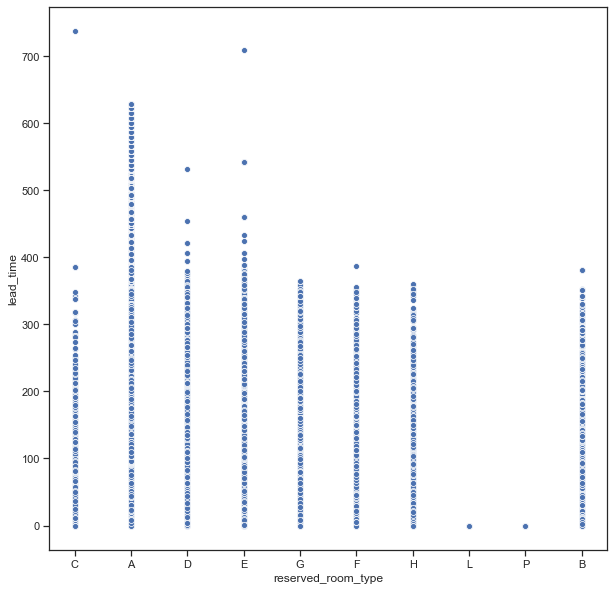

In [30]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='reserved_room_type', y='lead_time', data=data)

По диаграмме расеяния можно понять, что в среденем люди бронируют раньше тип А. Но если исследовать более глубоко, то в комнату B в среднем бранируют за более ранний срок. 
```
df[df['reserved_room_type’] == ‘A’][‘lead_time’].mean() === 110

df[df[‘reserved_room_type’] == ‘b’][‘lead_time’].mean() === 113
```

#### Гистограмма

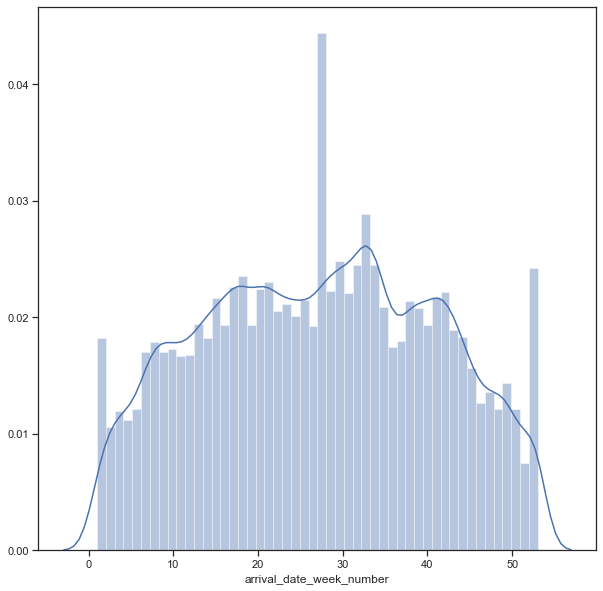

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['arrival_date_week_number'])

По гистограмме видно, что в 26 неделю года больше всего людей бронируют отели.

#### Jointplot

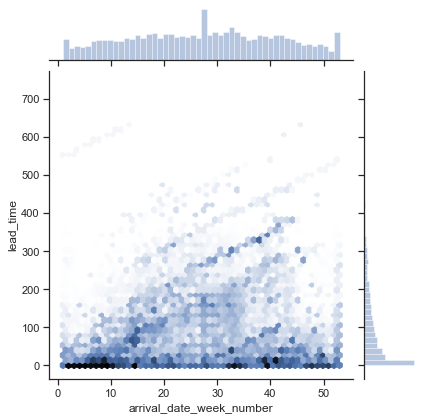

In [44]:
sns.jointplot(x='arrival_date_week_number', y='lead_time', data=data, kind="hex")

Можно сделать вывод что чем позже в году прибытие, тем дольше время прибывания. 

#### Парная диаграмма

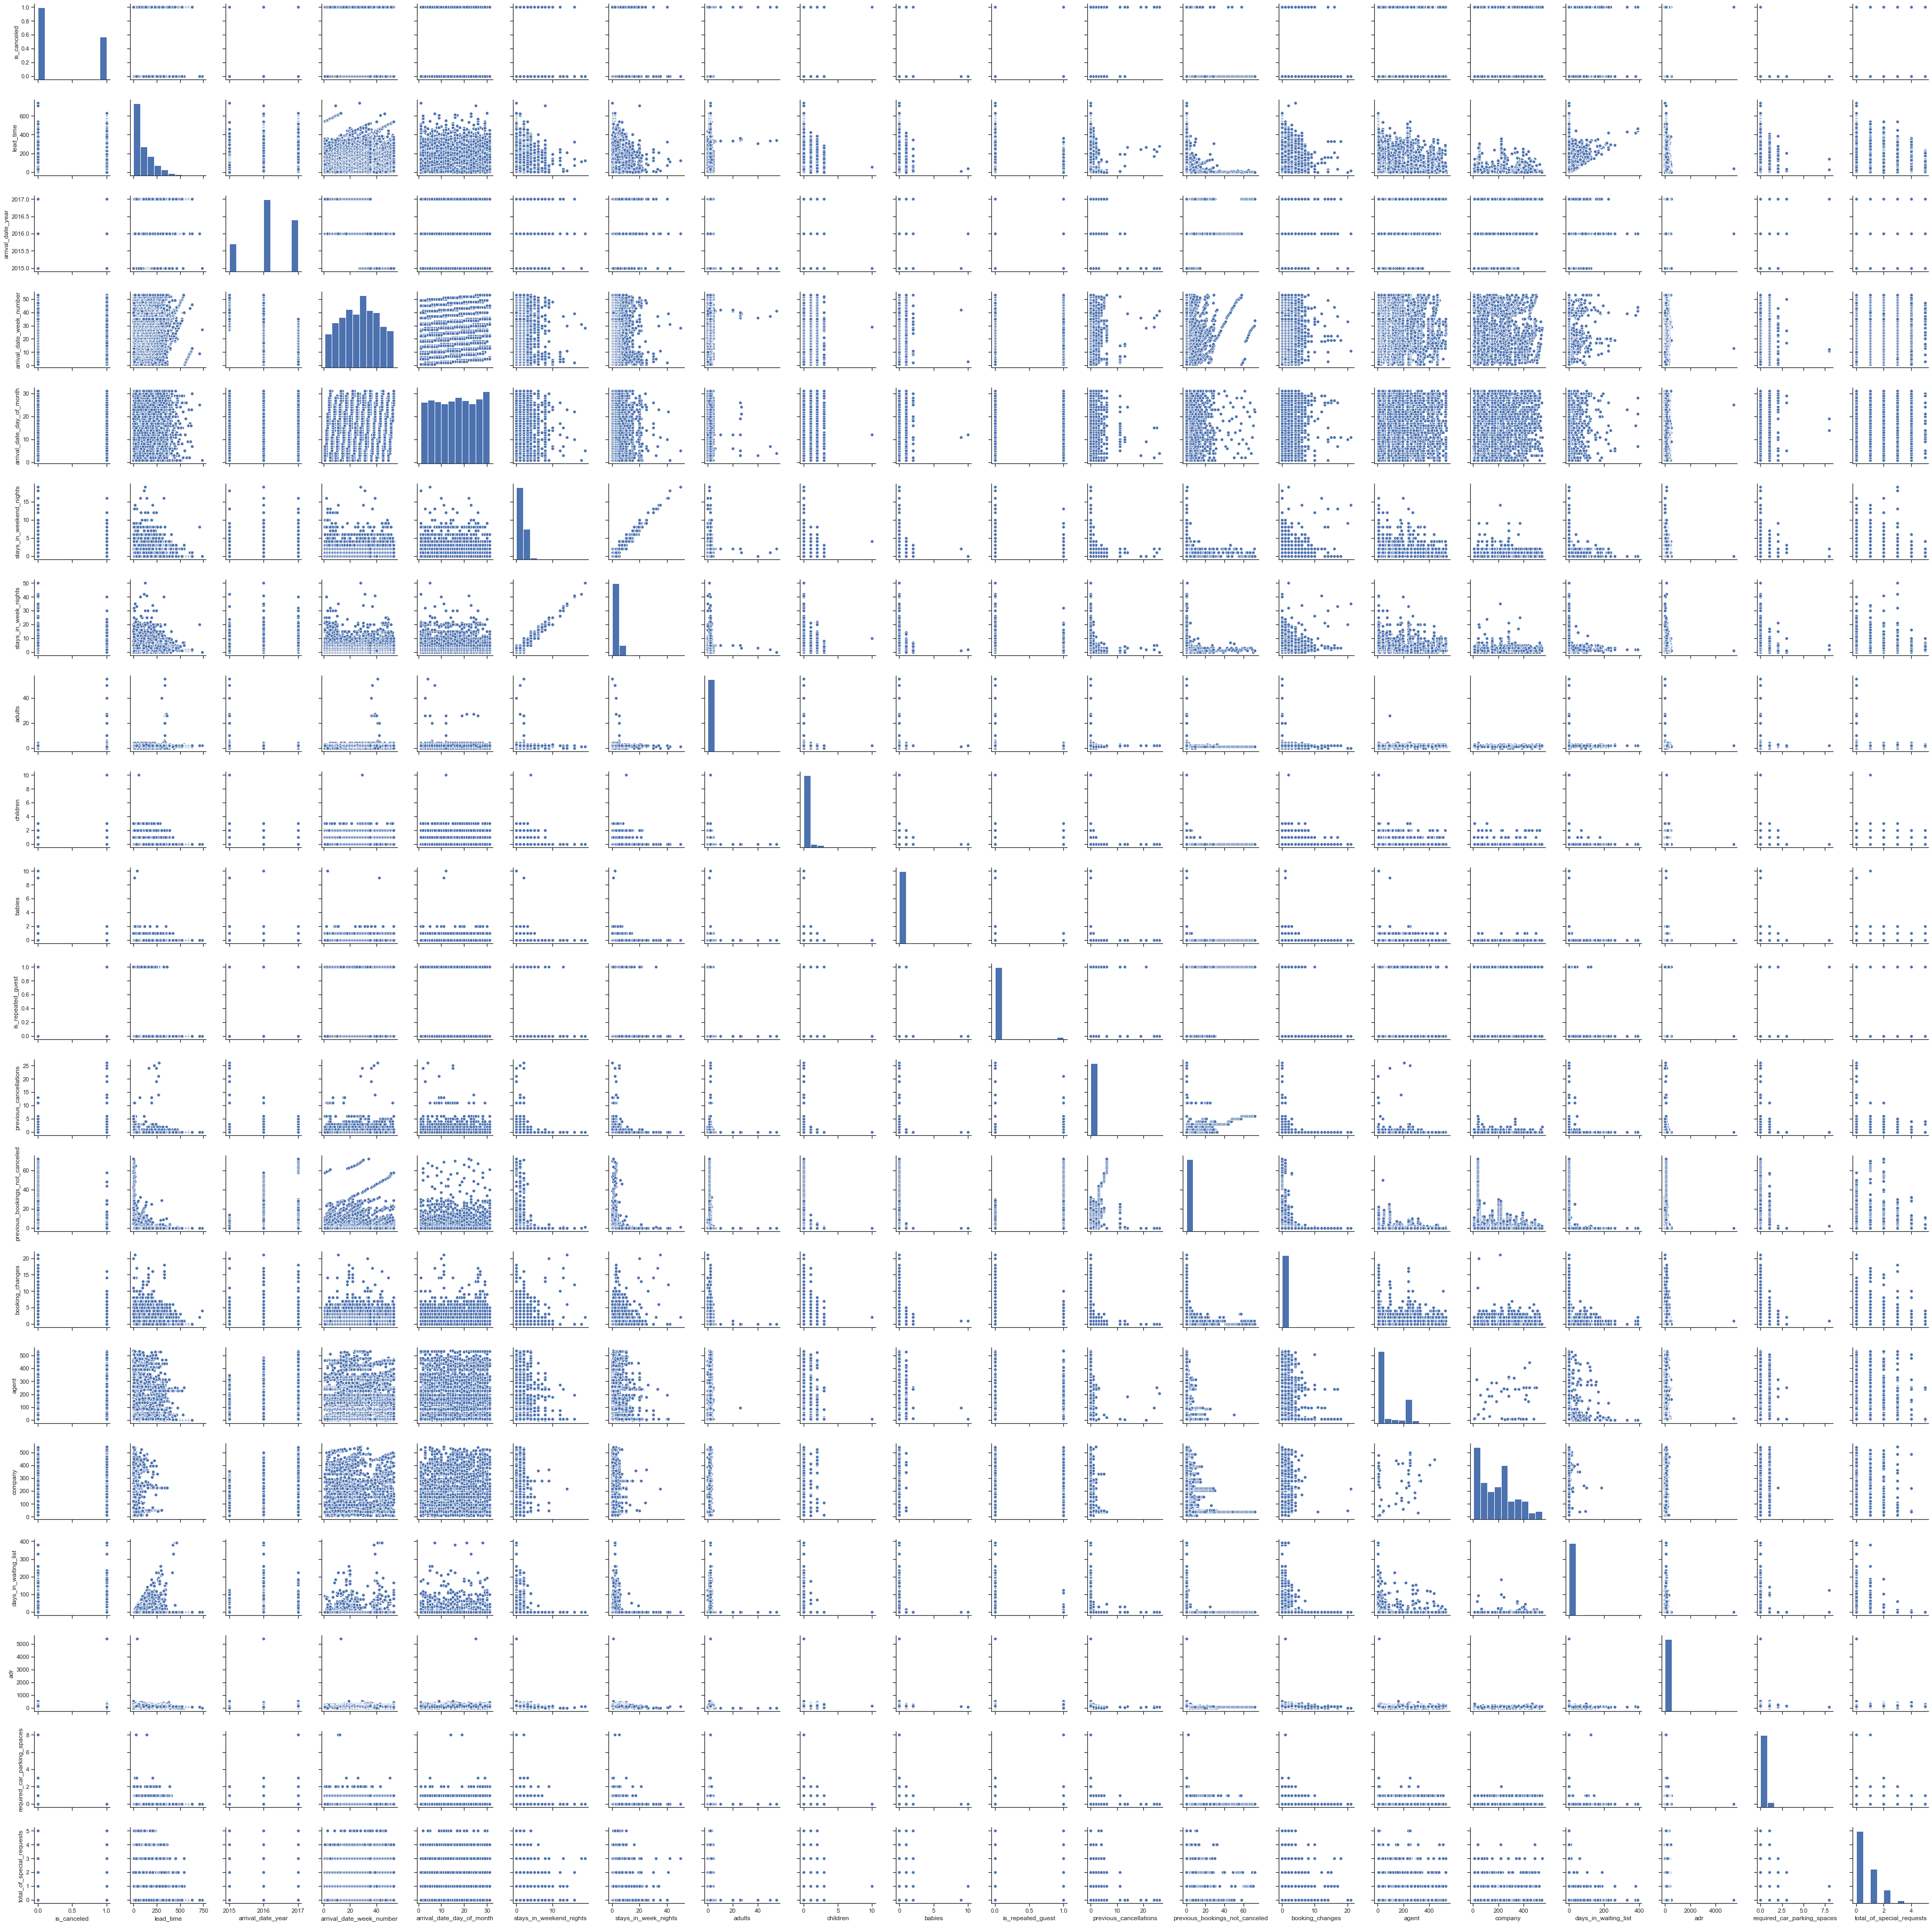

In [48]:
sns.pairplot(data)

#### Ящик с усами

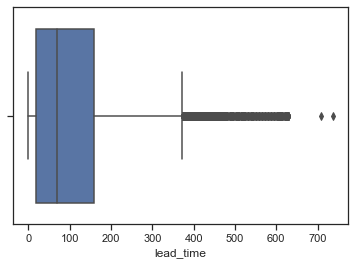

In [50]:
sns.boxplot(x=data['lead_time'])

#### Информация о корреляции признаков

Построим корреляционную матрицу по всему набору данных
Проверка корреляции признаков позволяет решить две задачи:

- Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "lead_team").Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.

- Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [51]:
data.corr()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


Видим, что:
lead_time кореллирует с is_canceled (0.3). От того что отменена бронь или нет, сильно зависит время с покупки до вьезда

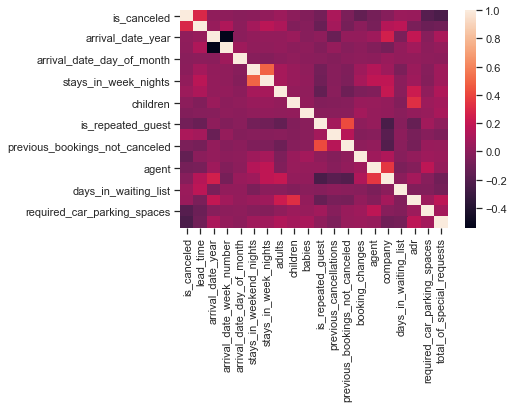

In [54]:
sns.heatmap(data.corr())